<a href="https://colab.research.google.com/github/Uz8351/Aprender_Makefile/blob/main/SVMZZZ_ZAULA_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisión del clasificador: 87.50%


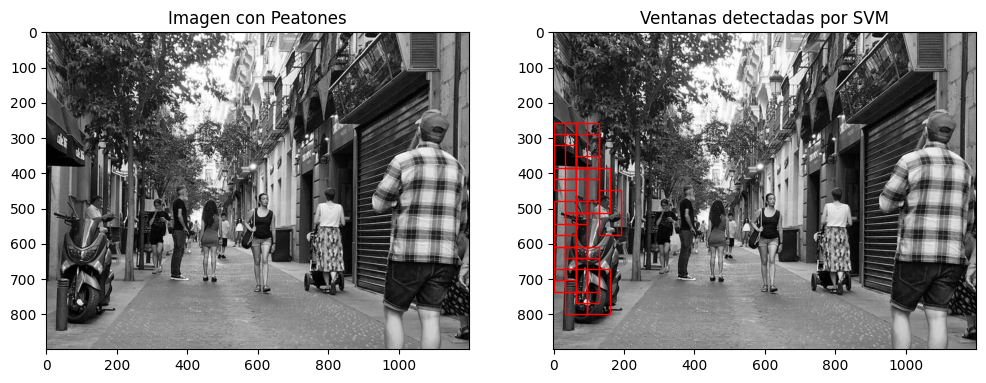

In [2]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import feature
from skimage import io
from skimage.transform import integral_image
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Descarga una imagen de ejemplo con peatones
image_path = "/content/drive/MyDrive/personas.jpg"
image = io.imread(image_path, as_gray=True)

# Definir una ventana deslizante para extraer muestras de la imagen
def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0] - window_size[0], step_size):
        for x in range(0, image.shape[1] - window_size[1], step_size):
            yield (x, y, image[y:y + window_size[0], x:x + window_size[1]])

# Extraer características HOG y etiquetas de la imagen
def extract_hog_features(image, window_size=(64, 128)):
    hog_features = []
    labels = []

    for (x, y, window) in sliding_window(image, step_size=32, window_size=window_size):
        # Calcular el HOG para cada ventana
        fd, hog_image = feature.hog(window, orientations=9, pixels_per_cell=(8, 8),
                                     cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

        hog_features.append(fd)

        # Etiquetar la ventana como positiva si hay un peatón en ella (demostrativo)
        labels.append(1 if x < 150 and y > 150 else 0)

    return hog_features, labels

# Extraer características y etiquetas
hog_features, labels = extract_hog_features(image)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Entrenar un clasificador SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador: {accuracy * 100:.2f}%")

# Visualizar la imagen y las ventanas detectadas
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Imagen con Peatones")

ax[1].imshow(image, cmap=plt.cm.gray)
for (x, y, window) in sliding_window(image, step_size=32, window_size=(64, 128)):
    if svm_classifier.predict([feature.hog(window, orientations=9, pixels_per_cell=(8, 8),
                                            cells_per_block=(2, 2), block_norm='L2-Hys')]) == 1:
        rect = plt.Rectangle((x, y), 64, 128, edgecolor='r', facecolor='none')
        ax[1].add_patch(rect)

ax[1].set_title("Ventanas detectadas por SVM")
plt.show()
